In [4]:
from datetime import datetime,date,time
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from pandas.tseries.offsets import Day

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

/home/techstar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
df = pd.read_csv("四川台区日负荷.csv")
df.序列 = df.序列.apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
df=df.set_index("序列")
df_series=df["2017-8-3":"2017-11-23"]# 11-24,25 and 12-11,12 do not have correct numbers. so dropped
dfh_series = df_series.resample('H').mean()#log shoul be after resampled....df_series = np.log(df_series)
dfh_log = np.log(dfh_series)

In [6]:
#TIMESTEPS = 672


In [7]:
#df["date"]=df.序列.apply(lambda x: x.date())

In [8]:
#df["time"]=df.序列.apply(lambda x: x.time())

In [9]:
#df_reshaped=df.pivot("date","time","值")
#df_reshaped = df_reshaped.dropna()

In [10]:
#tr=df[df.index<datetime(2017,12,15)]
#te=df[df.index>=datetime(2017,12,15)]

In [11]:
start_date=datetime(2017,8,5)
s_date=start_date.date().strftime("%Y-%m-%d")
e_date=(start_date+Day(7)).date().strftime("%Y-%m-%d")
t_date=(start_date+Day(8)).date().strftime("%Y-%m-%d")
t_date

'2017-08-13'

In [12]:
Max= dfh_log.max().值
Min= dfh_log.min().值
print(Max,Min)

3.8846985701286063 0.5622409107121464


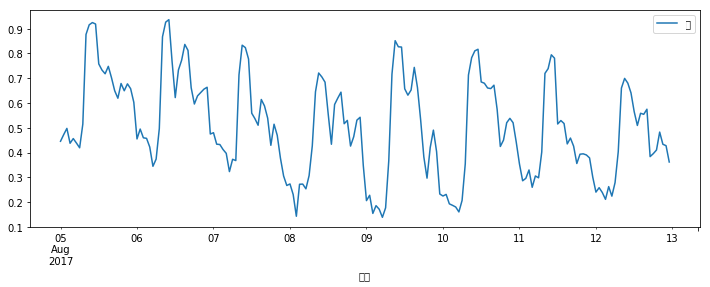

In [13]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

Xh = (dfh_log-Min)/(Max-Min)
Xh[s_date:e_date].plot()
plt.show()

In [14]:
TIMESTEPS = 24 * 7
STEP = 24 * 1

serieses=[]
nextday=[]

for i in range(0,len(Xh)-TIMESTEPS,STEP):
    serieses.append(np.array(Xh.iloc[i: i + TIMESTEPS]))
    nextday.append(np.array(Xh.iloc[i + TIMESTEPS:i+TIMESTEPS+STEP]))

In [118]:
print("total days : %d" % (len(Xh)/24))
print("total sample: %d" % len(nextday))
#Xh[-24:].values == nextday[-1]


total days : 113
total sample: 106


In [149]:
X_train=np.array(serieses[:-6]);Y_train=np.array(nextday[:-6])
X_test=np.array(serieses[-6:]);Y_test=np.array(nextday[-6:])

In [150]:
'''
print(X_train.shape)
print(Y_train.shape)
Y_train=Y_train.reshape(Y_train.shape[0],Y_train.shape[1])
print(Y_train.shape)#
'''

'\nprint(X_train.shape)\nprint(Y_train.shape)\nY_train=Y_train.reshape(Y_train.shape[0],Y_train.shape[1])\nprint(Y_train.shape)#\n'

In [151]:
'''
model = Sequential()
model.add(LSTM(96, input_shape=(168,1), init="normal"))
model.add(Dense(24,init="normal"))
'''

'\nmodel = Sequential()\nmodel.add(LSTM(96, input_shape=(168,1), init="normal"))\nmodel.add(Dense(24,init="normal"))\n'

In [152]:
'''
print(X_train.shape)
print(Y_train.shape)
X_train=X_train.reshape(100,24,7)
Y_train=Y_train.reshape(Y_train.shape[0],Y_train.shape[1])
print(X_train.shape)
print(Y_train.shape)
X_test = X_test.reshape(X_test.shape[0],24,7)
Y_test = Y_test.reshape(Y_test.shape[0],24)
'''

'\nprint(X_train.shape)\nprint(Y_train.shape)\nX_train=X_train.reshape(100,24,7)\nY_train=Y_train.reshape(Y_train.shape[0],Y_train.shape[1])\nprint(X_train.shape)\nprint(Y_train.shape)\nX_test = X_test.reshape(X_test.shape[0],24,7)\nY_test = Y_test.reshape(Y_test.shape[0],24)\n'

In [153]:
'''
model = Sequential()
model.add(LSTM(96, input_shape=(24,7), init="normal"))
model.add(Dense(24,init="normal"))
'''

'\nmodel = Sequential()\nmodel.add(LSTM(96, input_shape=(24,7), init="normal"))\nmodel.add(Dense(24,init="normal"))\n'

In [154]:
print(X_train.shape)
print(Y_train.shape)
X_train=X_train.reshape(X_train.shape[0],24,7)
#X_train = X_train.transpose((0,2,1))
Y_train=Y_train.reshape(Y_train.shape[0],Y_train.shape[1])
print(X_train.shape)
print(Y_train.shape)
X_test = X_test.reshape(X_test.shape[0],24,7)
#X_test = X_test.transpose((0,2,1))
Y_test = Y_test.reshape(Y_test.shape[0],24)

(100, 168, 1)
(100, 24, 1)
(100, 24, 7)
(100, 24)


In [155]:
#X_train.transpose((0,2,1))

In [156]:
#X_train

In [157]:
model = Sequential()
#model.add(LSTM(96, input_shape=(7,24), init="normal"))
model.add(LSTM(192, input_shape=(24,7), init="normal"))
model.add(Dense(24,init="normal"))


/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(192, input_shape=(24, 7), kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, kernel_initializer="normal")`
  after removing the cwd from sys.path.


In [158]:
#model.compile(loss='mae', optimizer='adam')

In [159]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(lr=0.1))

In [163]:
model.fit(X_train, Y_train, epochs=100,batch_size=10, shuffle=True,verbose=2,validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 2/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 3/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 4/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 5/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 6/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 7/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 8/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 9/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 10/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 11/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 12/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 13/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 14/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 15/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 16/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 17/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 18/100
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 19/10

In [133]:
model.save("model_1.h5")

In [134]:
from keras.models import load_model
model = load_model('model_1.h5')

In [164]:
pred_test=model.predict(X_test)
pred_train = model.predict(X_train)

In [165]:
import matplotlib.pyplot as plt

In [166]:
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)

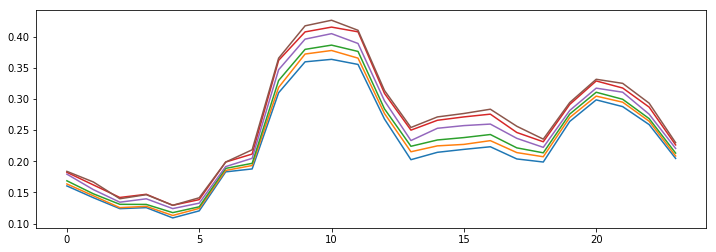

In [167]:
for i in range(pred_test.shape[0]):
    plt.plot(pred_test[i,:])
#    plt.plot(y[3,:])

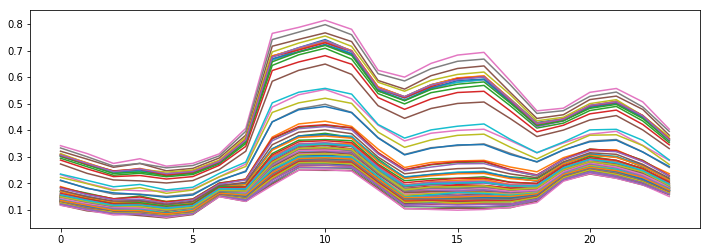

In [168]:
for i in range(pred_train.shape[0]):
    plt.plot(pred_train[i,:])
#    plt.plot(y[3,:])

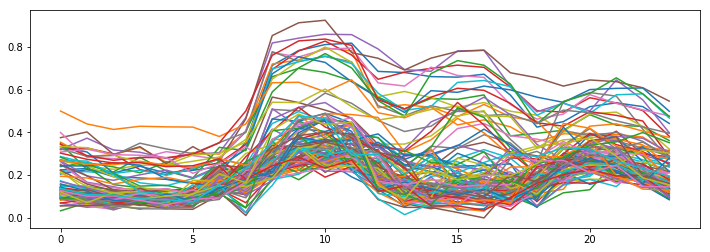

In [169]:
for i in range(Y_train.shape[0]):
    plt.plot(Y_train[i])
#    plt.plot(y[3,:])

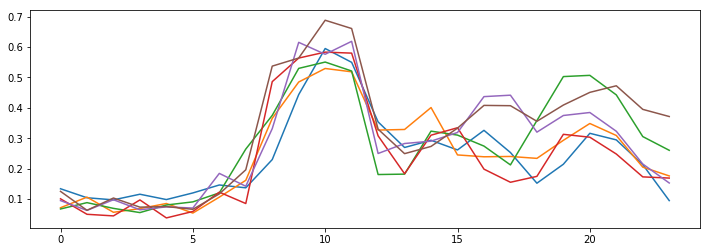

In [170]:
for i in range(Y_test.shape[0]):
    plt.plot(Y_test[i])


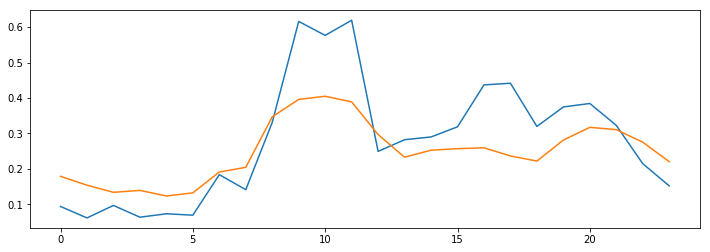

In [171]:
plt.plot(Y_test[4])
plt.plot(pred_test[4,:])

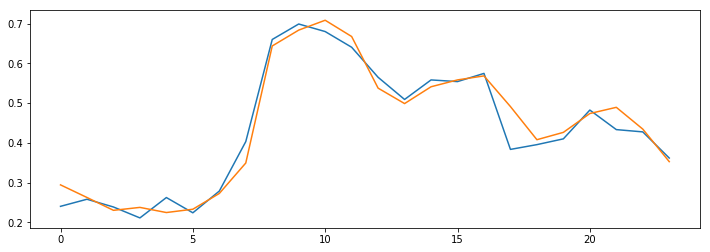

In [175]:
plt.plot(Y_train[2])
plt.plot(pred_train[2,:])

In [173]:
result[:50].plot(alpha =0.5,figsize = (12,4))

NameError: name 'result' is not defined

In [97]:
a=y.reshape(1440)

In [96]:
result=df.iloc[-1440:]

In [100]:
result["pred"]=a*(Max-Min).values+Min.values

/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
result.loc["pred"]=result.pred*(Max.values-Min.values)+Min.values

/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
result[10:60]

,值,pred
序列,,
2017-12-17 02:45:00,1.9446,2.619534
2017-12-17 03:00:00,2.1909,2.409545
2017-12-17 03:15:00,2.2726,2.402391
2017-12-17 03:30:00,2.1879,2.440498
2017-12-17 03:45:00,2.3731,2.421886
2017-12-17 04:00:00,2.1781,2.503651
2017-12-17 04:15:00,2.1306,2.454529
2017-12-17 04:30:00,2.2826,2.399416
2017-12-17 04:45:00,2.4268,2.442887


In [98]:
(a*(Max-Min).values+Min.values).shape

(1440,)